# Yandex Data Science School
## Linear Regression & Regularization Exercise.


## Outline
In this exercise you will learn the following topics:

1. Refresher on how linear regression is solved in batch and in Gradient Descent 
2. Implementation of Ridge Regression
3. Comparing Ridge, Lasso and vanila Linear Regression on a dataset

# Git Exercise
In this exercise you will also experience working with github.

You might need to install local python enviroment.
Installation Instruction for ex2 - working on a local python environment:
https://docs.google.com/document/d/1G0rBo36ff_9JzKy0EkCalK4m_ThNUuJ2bRz463EHK9I

## please add the github link of your work below:


example: https://github.com/username/exercise_name

## Refresher on Ordinary Least Square (OLS) aka Linear Regeression

### Lecture Note

In Matrix notation, the matrix $X$ is of dimensions $n \times p$ where each row is an example and each column is a feature dimension. 

Similarily, $y$ is of dimension $n \times 1$ and $w$ is of dimensions $p \times 1$.

The model is $\hat{y}=X\cdot w$ where we assume for simplicity that $X$'s first columns equals to 1 (one padding), to account for the bias term.

Our objective is to optimize the loss $L$ defines as resiudal sum of squares (RSS): 

$L_{RSS}=\frac{1}{N}\left\Vert Xw-y \right\Vert^2$ (notice that in matrix notation this means summing over all examples, so $L$ is scalar.)

To find the optimal $w$ one needs to derive the loss with respect to $w$.

$\frac{\partial{L_{RSS}}}{\partial{w}}=\frac{2}{N}X^T(Xw-y)$ (to see why, read about [matrix derivatives](http://www.gatsby.ucl.ac.uk/teaching/courses/sntn/sntn-2017/resources/Matrix_derivatives_cribsheet.pdf) or see class notes )

Thus, the gardient descent solution is $w'=w-\alpha \frac{2}{N}X^T(Xw-y)$.

Solving $\frac{\partial{L_{RSS}}}{\partial{w}}=0$ for $w$ one can also get analytical solution:

$w_{OLS}=(X^TX)^{-1}X^Ty$

The first term, $(X^TX)^{-1}X^T$ is also called the pseudo inverse of $X$.

See [lecture note from Stanford](https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf) for more details.


## Exercise 1 - Ordinary Least Square
* Get the boston housing dataset by using the scikit-learn package. hint: [load_boston](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html)

* What is $p$? what is $n$ in the above notation? hint: [shape](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.shape.html)

* write a model `OrdinaryLinearRegression` which has a propoery $w$ and 3 methods: `fit`, `predict` and `score` (which returns the MSE on a given sample set). Hint: use [numpy.linalg.pinv](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.pinv.html) to be more efficient.

* Fit the model. What is the training MSE?

* Plot a scatter plot where on x-axis plot $Y$ and in the y-axis $\hat{Y}_{OLS}$

* Split the data to 75% train and 25% test 20 times. What is the average MSE now for train and test? Hint: use [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) or [ShuffleSplit](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html).

* Use a t-test to proove that the MSE for training is significantly smaller than for testing. What is the p-value? Hint: use [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html). 

In [41]:
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ShuffleSplit
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from statistics import mean

try:
    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    y = raw_df.values[1::2, 2]
except:
    b = load_boston()
    X = b.data
    y = b.target
    df = pd.DataFrame(X, columns=b.feature_names)


In [42]:
# * write a model `Ols` which has a property $w$ and 3 methods: `fit`, `predict` and `score`.? hint: use [numpy.linalg.pinv](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.pinv.html) to be more efficient.

class Ols(object):
  def __init__(self):
    self.w = None
    
  @staticmethod
  def pad(X):
    return np.pad(X, [(0,0), (1,0)], constant_values=1)
  
  def fit(self, X, Y):
    #remeber pad with 1 before fitting
    X, Y = self._preprocess(X, Y) 
    return self._fit(X, Y)
  
  def _fit(self, X, Y):
    # optional to use this
    self.w = np.linalg.pinv(X.T @ X) @ X.T @ Y
    return self

  def _preprocess(self, X, Y):
    return self.pad(X), Y
  
  def predict(self, X):
    #return wx
    X = Ols.pad(X)
    return  self._predict(X) 
    
  def _predict(self, X):
    # optional to use this
    return X @ self.w

  def score(self, X, Y):
    #return MSE
    return mean_squared_error(Y, self.predict(X))

(n, p) = (506, 13)
MSE = 21.8948311817292
Pred VS Truth:


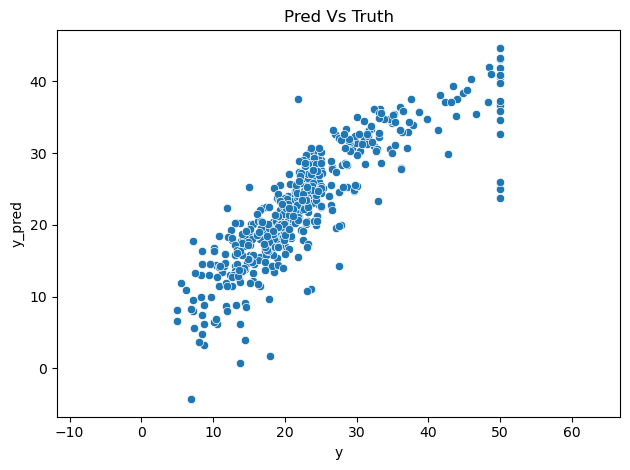

Average train MSE: 21.153196035114522
Average test MSE: 25.463431647395705
Train is significantly lower than test error. P-Value = 0.001150119097139309


In [43]:
# n, p
print(f'(n, p) = {X.shape}')

# MSE
ols = Ols().fit(X, y)
y_pred = ols.predict(X)
print(f'MSE = {ols.score(X, y)}')
 
 # Pred vs truth
print('Pred VS Truth:')
sns.scatterplot(x=y, y=y_pred)
ax = plt.gca() 
ax.axis('equal')
plt.xlabel('y')
plt.ylabel('y_pred')
plt.title('Pred Vs Truth')
plt.tight_layout()
plt.show();

# Average MSE
train_mse, test_mse = [], []
for train_idx, test_idx in ShuffleSplit(n_splits=20, train_size=0.75, test_size=0.25, random_state=1).split(X):
    ols = Ols().fit(X[train_idx], y[train_idx])
    train_mse.append(ols.score(X[train_idx], y[train_idx])) 
    test_mse.append(ols.score(X[test_idx], y[test_idx])) 

print(f'Average train MSE: {mean(train_mse)}')
print(f'Average test MSE: {mean(test_mse)}')
    
# Significantly better train:
print(f"Train is significantly lower than test error. P-Value = {ttest_rel(train_mse, test_mse, alternative='less').pvalue}")

* Write a new class `OrdinaryLinearRegressionGradientDescent` which inherits from `OrdinaryLinearRegression` and solves the problem using gradinet descent. The class should get as a parameter the learning rate and number of iteration. Plot the class convergance. What is the effect of learning rate? How would you find number of iteration automatically? Note: Gradient Descent does not work well when features are not scaled evenly (why?!). Be sure to normalize your features first.
    > TODO

* The following parameters are optional (not mandatory to use):
    * early_stop - True / False boolean to indicate to stop running when loss stops decaying and False to continue.
    * verbose- True/False boolean to turn on / off logging, e.g. print details like iteration number and loss (https://en.wikipedia.org/wiki/Verbose_mode)
    * track_loss - True / False boolean when to save loss results to present later in learning curve graphs

In [44]:
# Plot the loss convergance. for each alpha, learning rate plot the MSE with respect to number of iterations.
# What is the effect of learning rate? 
# How would you find number of iteration automatically? 

class Normalizer():

  def __init__(self):
    self.min = None
    self.max = None

  def fit(self, X,):
    self.min = X.min(axis=0)
    self.max = X.max(axis=0)
    return self

  def predict(self, X):
    #apply normalization
    return (X - self.min) / (self.max - self.min)

  def fit_predict(self, X, *args):
    return self.fit(X).predict(X)
  
  transform = predict
  fit_transform = fit_predict
  
    
class OlsGd(Ols):
  
  def __init__(self, learning_rate=.05, 
               num_iteration=1000, 
               normalize=True,
               early_stop=True,
               verbose=True):
    
    super(OlsGd, self).__init__()
    self.learning_rate = learning_rate
    self.num_iteration = num_iteration
    self.early_stop = early_stop
    self.normalize = normalize
    self.normalizer = Normalizer() 
    self.verbose = verbose
    self.mses = []
    self._best_mse = float('inf')
  
  def _preprocess(self, X, Y):

    if self.normalize:
      X = self.normalizer.fit_predict(X)

    X = self.pad(X)
    
    self.w = np.random.uniform(-.3, .3, X.shape[1])

    self.mses.append(self._score(X, Y))
    return X, Y

  def _score(self, X, Y):
    Y_pred = self._predict(X)
    return mean_squared_error(Y, Y_pred)


  def score(self, X, Y):
    Y_pred = self.predict(X)
    return mean_squared_error(Y, Y_pred)


  def _fit(self, X, Y, reset=True, track_loss=True):
    #remember to normalize the data before starting
    for _ in range(self.num_iteration):
      self.w -= self._step(X, Y)

      mse = self._score(X,Y)
      if mse < self._best_mse:
        self._best_mse = mse

      self.mses.append(mse)
      
      if self.early_stop and self._is_converged(): 
        break
    
    return self

  def _is_converged(self):
    n = 5
    return np.allclose(self.mses[-n:], self._best_mse, rtol=0, atol=1e-4)


  def predict(self, X):
    #remeber to normalize the data before starting
    if self.normalize:
      X = self.normalizer.predict(X)
    X = self.pad(X)
    return self._predict(X)
      
  def _step(self, X, Y):
    # use w update for gradient descent
    return (X.T @ (X @ self.w - Y)) * self.learning_rate / X.shape[0]


## Exercise 2 - Ridge Linear Regression

Recall that ridge regression is identical to OLS but with a L2 penalty over the weights:

$L(y,\hat{y})=\sum_{i=1}^{i=N}{(y^{(i)}-\hat{y}^{(i)})^2} + \lambda \left\Vert w \right\Vert_2^2 $

where $y^{(i)}$ is the **true** value and $\hat{y}^{(i)}$ is the **predicted** value of the $i_{th}$ example, and $N$ is the number of examples

* Show, by differentiating the above loss, that the analytical solution is $w_{Ridge}=(X^TX+\lambda I)^{-1}X^Ty$
    >
    > $ L(y,\hat{y}) = (Xw - y)^T(Xw - y) + \lambda w^Tw = w^TX^TX w -2w^TX^Ty +y^Ty + \lambda w^T w$ 
    >
    > $\implies \frac{\partial L}{\partial w}= 2X^TX w - 2X^Ty + 2\lambda w = 2((X^TX + \lambda I) w - X^Ty)$
    >
    > Requiring $\frac{\partial L}{\partial w} = 0$, we get:
    >
    > $(X^TX + \lambda I)\hat w = X^Ty $
    >
    > $\implies \hat w = w_{Ridge} = (X^TX + \lambda I)^{-1}X^Ty$
* Change `OrdinaryLinearRegression` and `OrdinaryLinearRegressionGradientDescent` classes to work also for ridge regression (do not use the random noise analogy but use the analytical derivation). Either add a parameter, or use inheritance.
* **Bonus: Noise as a regularizer**: Show that OLS (ordinary least square), if one adds multiplicative noise to the features the **average** solution for $W$ is equivalent to Ridge regression. In other words, if $X'= X*G$ where $G$ is an uncorrelated noise with variance $\sigma$ and mean 1, then solving for $X'$ with OLS is like solving Ridge for $X$. What is the interpretation? 



In [47]:
class RidgeLs(Ols):
  def __init__(self, ridge_lambda, *wargs, **kwargs):
    super(RidgeLs,self).__init__(*wargs, **kwargs)
    self.ridge_lambda = ridge_lambda
    
  def _fit(self, X, Y):
    #Closed form of ridge regression
    self.w = np.linalg.pinv(X.T @ X + np.identity(X.shape[1]) * self.ridge_lambda) @ X.T @ y
    return self


class RidgeGd(OlsGd):
  def __init__(self, ridge_lambda, *wargs, **kwargs):
    super(RidgeGd, self).__init__(*wargs, **kwargs)
    self.ridge_lambda = ridge_lambda
    
  def _step(self, X, Y):
    n = X.shape[0]
    gradient = 2*((X.T @ X + np.identity(X.shape[1]) * self.ridge_lambda) @ self.w - X.T @ Y) 
    return gradient * self.learning_rate / n 


### Use scikitlearn implementation for OLS, Ridge and Lasso

In [48]:
from sklearn.linear_model import SGDRegressor, Ridge
from sklearn.pipeline import Pipeline


me = OlsGd().fit(X, y)
them = Pipeline([('scaler', Normalizer()), 
                 ('regressor', SGDRegressor(penalty=None))]
                 ).fit(X,y)

me_pred = me.predict(X)
them_pred = them.predict(X)

print(f"GD no penalty: max prediction diff {np.abs(me_pred - them_pred).max()}.")

### 

me = RidgeLs(ridge_lambda=1e-4).fit(X, y)
them = Ridge(alpha=1e-4).fit(X,y)

me_pred = me.predict(X)
them_pred = them.predict(X)

print(f"Ridge Least Squares: max prediction diff {np.abs(me_pred - them_pred).max()}.")

# ###
 
me = RidgeGd(ridge_lambda=1e-4).fit(X, y)
them = Pipeline([('scaler', Normalizer()), 
                 ('regressor', SGDRegressor(penalty='l1', alpha=1e-4).fit(X,y))]
                 ).fit(X,y)


me_pred = me.predict(X)
them_pred = them.predict(X)
print(f"GD Ridge: max prediction diff {np.abs(me_pred - them_pred).max()}")

them = SGDRegressor(penalty='l2').fit(X,y)
them_pred = them.predict(X)

GD no penalty: max prediction diff 3.084370211436422.
Ridge Least Squares: max prediction diff 0.0008007152613771495.
GD Ridge: max prediction diff 0.23558954120635178
